## Importing Libraries

In [238]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns
# get ANOVA table as R like output
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.regression.mixed_linear_model import MixedLM

__Example 17.3.3__ (Onion rings) Five different types of oil (olive, soybean, corn, peanut, and sunflower) are often used for frying onion rings. It is not known whether the amount of oil absorbed by the onion rings depends on the type of oil. For five types of oil, certain batches of equal size (6) of onion rings are prepared. The experiment was carried out in random order. The data in Table 17.1 show the amount of oil (in grams) absorbed per batch. We want to test a hypothesis at the 5% level of significance that the absorption of oil in frying onion rings is same for all five types of oil.

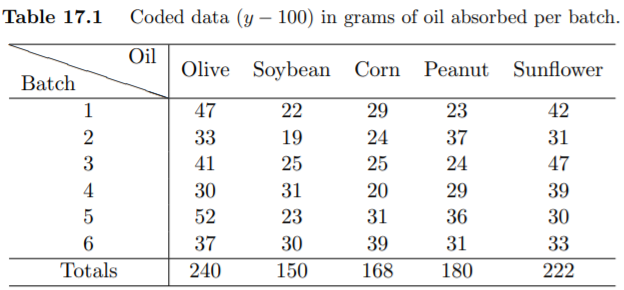

In [239]:
obs = [47,33,41,30,52,37,22,19,25,31,23,30,29,24,25,20,31,39,23,37,24,29,36,31,42,31,47,39,30,33]
oil_type = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5]

# storing data into a dataframe
df = pd.DataFrame({'obs': obs, 'oil_type': oil_type})

# Fitting ANOVA model. Make sure to change variable ‘oil.type’ to a ‘C’/ categorical type as follows
model = ols('obs ~ C(oil_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq    df         F    PR(>F)
C(oil_type)   948.0   4.0  5.465867  0.002651
Residual     1084.0  25.0       NaN       NaN


In [240]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['obs'], groups=df['oil_type'], alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2    -15.0 0.0047 -26.1658 -3.8342   True
     1      3    -12.0 0.0308 -23.1658 -0.8342   True
     1      4    -10.0 0.0949 -21.1658  1.1658  False
     1      5     -3.0    0.9 -14.1658  8.1658  False
     2      3      3.0    0.9  -8.1658 14.1658  False
     2      4      5.0 0.6647  -6.1658 16.1658  False
     2      5     12.0 0.0308   0.8342 23.1658   True
     3      4      2.0    0.9  -9.1658 13.1658  False
     3      5      9.0 0.1577  -2.1658 20.1658  False
     4      5      7.0 0.3745  -4.1658 18.1658  False
-----------------------------------------------------


__Example 17.3.6__ (Using Python and applying the Kruskal–Wallis test). Analyze the onion ring data in Example 17.3.3, using the Kruskal–Wallis test.

In [241]:
# convert `y` to a numpy array for more convenient indexing
y = np.array(df.obs)

# find unique group labels and their corresponding indices
label, idx = np.unique(df.oil_type, return_inverse=True)

# make a list of arrays containing the y-values corresponding to each unique label
groups = [y[idx == i] for i, l in enumerate(label)]

# use `*` to unpack the list as a sequence of arguments to `stats.kruskal`
H, p = stats.kruskal(*groups)

print(H, p)

13.729562560548484 0.008210129736433178


##### Alternative, Concise Method

In [242]:
data = [df.loc[ids, 'obs'].values for ids in df.groupby('oil_type').groups.values()]
H, p = stats.kruskal(*data)

print(H, p)

13.729562560548484 0.008210129736433178


__Example 17.4.2__ (Gasoline octane levels) The quality of gasoline is usually determined by its octane number. An experimenter determines the octane numbers of five gasolines using four different methods. Since “Methods” is a nuisance variable, the experimenter decided to use an RCB-design. The experiment in each block was carried out in random order. The data obtained are shown in Table 17.2. Analyze these data using Python.

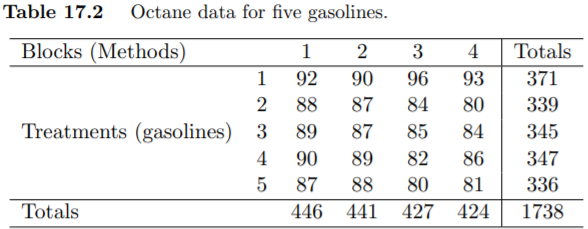

In [243]:
Obs = [92,88,89,90,87,90,87,87,89,88,96,84,85,82,80,93,80,84,86,81]
Gas = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
Method = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]

# storing data into a dataframe
df = pd.DataFrame({'Obs': Obs, 'Gas': Gas, 'Method': Method})

# preview data in dataframe
df.head()

,Obs,Gas,Method
0,92,1,1
1,88,2,1
2,89,3,1
3,90,4,1
4,87,5,1


In [244]:
# Fitting ANOVA model. Make sure to change variables to a ‘C’/ categorical type as follows
model = ols('Obs ~ C(Gas) + C(Method)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

           sum_sq    df         F    PR(>F)
C(Gas)      190.8   4.0  6.168103  0.006183
C(Method)    68.2   3.0  2.939655  0.076319
Residual     92.8  12.0       NaN       NaN


In [245]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['Obs'], groups=df['Gas'], alpha=0.05)
print(tukey)

print()

# for Obs and Method
tukey = pairwise_tukeyhsd(endog=df['Obs'], groups=df['Method'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     -8.0 0.0251 -15.1544 -0.8456   True
     1      3     -6.5  0.084 -13.6544  0.6544  False
     1      4     -6.0 0.1228 -13.1544  1.1544  False
     1      5    -8.75 0.0134 -15.9044 -1.5956   True
     2      3      1.5    0.9  -5.6544  8.6544  False
     2      4      2.0    0.9  -5.1544  9.1544  False
     2      5    -0.75    0.9  -7.9044  6.4044  False
     3      4      0.5    0.9  -6.6544  7.6544  False
     3      5    -2.25 0.8509  -9.4044  4.9044  False
     4      5    -2.75 0.7365  -9.9044  4.4044  False
-----------------------------------------------------

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     -1.0    0.9  -8.6187 6.6187  False
     1      3     -3.8 0.5014 -

__Example 17.4.3__ (Example 17.4.2 revisited) Analyze the gasoline data in Table 17.2 using the Friedman
test with Python.

In [246]:
data = [df.loc[ids, 'Obs'].values for ids in df.groupby(['Gas']).groups.values()]
stats.friedmanchisquare(*data)

FriedmanchisquareResult(statistic=11.493670886075957, pvalue=0.021541760663557237)

__Example 17.5.2__ Analyze the defective ball-bearings data in Example 17.5.1 (see Text) using Python.

In [247]:
Obs = [4,6,3,5,2,4,6,8,2,4,5,3,1,5,4,6,0,4,2,2,2,6,4,4,2,2,0,4,1,3,3,5]
Operators = [1,1,2,2,3,3,4,4,1,1,2,2,3,3,4,4,1,1,2,2,3,3,4,4,1,1,2,2,3,3,4,4]
Machines = [1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4]

# storing data into a dataframe
df = pd.DataFrame({'Obs': Obs, 'Operators': Operators, 'Machines': Machines})

# preview data in dataframe
df.head()

,Obs,Operators,Machines
0,4,1,1
1,6,1,1
2,3,2,1
3,5,2,1
4,2,3,1


In [248]:
# Fitting ANOVA model. Make sure to change variables to a ‘C’/ categorical type as follows
model = ols('Obs ~ C(Operators) * C(Machines)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq    df         F    PR(>F)
C(Operators)                24.0   3.0  2.560000  0.091359
C(Machines)                 23.0   3.0  2.453333  0.100787
C(Operators):C(Machines)    13.0   9.0  0.462222  0.879177
Residual                    50.0  16.0       NaN       NaN


In [249]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['Obs'], groups=df['Operators'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      0.0    0.9 -2.3925 2.3925  False
     1      3      0.0    0.9 -2.3925 2.3925  False
     1      4      2.0 0.1264 -0.3925 4.3925  False
     2      3      0.0    0.9 -2.3925 2.3925  False
     2      4      2.0 0.1264 -0.3925 4.3925  False
     3      4      2.0 0.1264 -0.3925 4.3925  False
---------------------------------------------------


In [250]:
# for Obs and Machines
tukey = pairwise_tukeyhsd(endog=df['Obs'], groups=df['Machines'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     -1.0 0.6549 -3.4064 1.4064  False
     1      3    -1.75 0.2175 -4.1564 0.6564  False
     1      4    -2.25 0.0733 -4.6564 0.1564  False
     2      3    -0.75  0.811 -3.1564 1.6564  False
     2      4    -1.25 0.4988 -3.6564 1.1564  False
     3      4     -0.5    0.9 -2.9064 1.9064  False
---------------------------------------------------


__Example 17.7.2__ Redo Example 17.7.1 using Python.

In [251]:
Obs = [4.6,4.2,4,4.7,4.5,4.1,4.2,3.9,4.2,4.1,4.3,4.6,4,4.5,4.2,3.9,4.3,4.1,4.8,4.5,4.2,4.5,4,4.9,4.1,3.9,4.2,4.2,3.9,4.6,4.1,5,5.2,4.9,4.8,5]
Machi = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4]
Oper = [1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3]

# storing data into a dataframe
df = pd.DataFrame({'Obs': Obs, 'Machi': Machi, 'Oper': Oper})

# preview data in dataframe
df.head()

,Obs,Machi,Oper
0,4.6,1,1
1,4.2,1,1
2,4.0,1,1
3,4.7,1,2
4,4.5,1,2


In [252]:
model = ols('Obs ~  C(Machi) + C(Machi) / C(Oper)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                    df    sum_sq   mean_sq         F    PR(>F)
C(Machi)           3.0  0.922222  0.307407  3.135033  0.044115
C(Machi):C(Oper)   8.0  1.344444  0.168056  1.713881  0.146433
Residual          24.0  2.353333  0.098056       NaN       NaN


In [253]:
model1 = MixedLM.from_formula("Obs ~ 1", re_formula="1", vc_formula={"Oper": "0 + C(Oper)"},
                groups="Machi", data=df)
result1 = model1.fit()
print(result1.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Obs     
No. Observations: 36      Method:             REML    
No. Groups:       4       Scale:              0.0981  
Min. group size:  9       Log-Likelihood:     -14.6847
Max. group size:  9       Converged:          Yes     
Mean group size:  9.0                                 
------------------------------------------------------
             Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    4.367    0.092 47.255 0.000  4.186  4.548
Machi Var    0.015    0.095                           
Oper Var     0.023    0.103                           

